In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,RBF,GenericKernelMixin
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import os
from sklearn.model_selection import GridSearchCV,LeaveOneGroupOut
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [3]:
def create_data(EIS_files,Capacity_files,Battery_Num):
    
    dataset=np.zeros(shape=(1,122))
        
    features_path='Alpha Lee Paper/EIS Data/EIS data/'+str(EIS_files)
    targets_path='Alpha Lee Paper/Capacity Data/Capacity data/'+str(Capacity_files)
    features_data=pd.read_csv(features_path,delimiter='\t')
    targets_data=pd.read_csv(targets_path,delimiter='\t')
    
    Data1=[]
        
    for i in range(int(features_data['cycle number'].min()),int(features_data['cycle number'].max())+1):
        try:
            features=features_data[features_data[features_data.columns[1]]==i]
            features=features.iloc[:,3:5]
            re=features.iloc[:,0]
            im=features.iloc[:,1]
        
            capacity=[targets_data[targets_data['cycle number']==i]['Capacity/mA.h'].values[-1]]
            tot=np.concatenate([re,im,capacity,[Battery_Num]],axis=0)
        except:
            continue
        #print(tot.shape)
        Data1.append(tot)
    Data1=np.array(Data1)
    print(Data1.shape)
    dataset=np.concatenate([dataset,Data1],axis=0)
    dataset=pd.DataFrame(dataset)
    
    
    columns=[]
    for i in range(1,61):
        columns.append('Real Z'+str(i))
    
    for i in range(1,61):
        columns.append('Imaginary Z'+str(i))   
    
    columns.extend(['Capacity','Battery Number'])
    
    
    dataset.columns=columns
    
    return dataset.iloc[1:,:]

In [4]:
EIS_Data=os.listdir(path='Alpha Lee Paper/EIS data/EIS Data')
Capacity_Data=os.listdir(path='Alpha Lee Paper/Capacity data/Capacity Data')
Capacity_Data=Capacity_Data[1:]

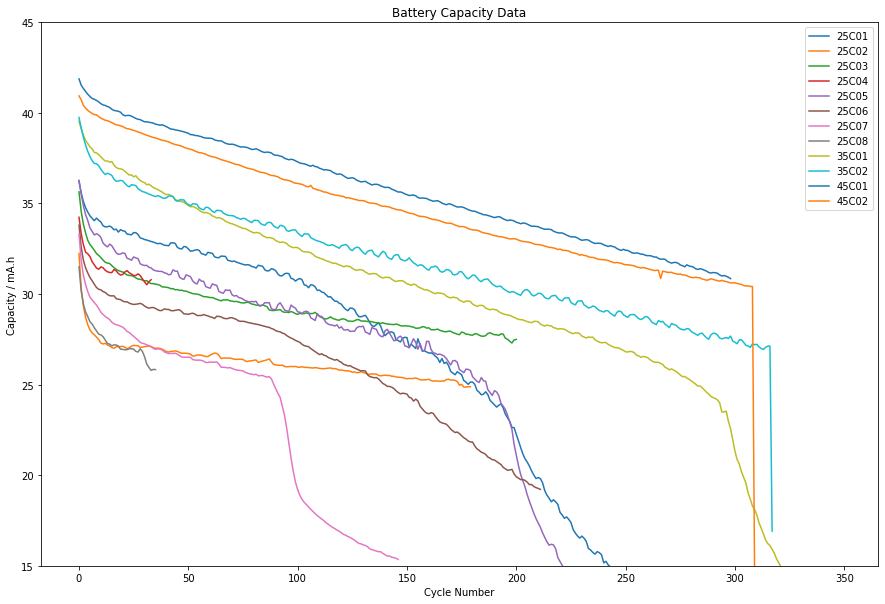

In [214]:
plt.figure(figsize=(15,10))
plt.ylim([15,45])
plt.title(label='Battery Capacity Data')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity / mA.h')
for i in Capacity_Data: 
    path='Alpha Lee Paper/Capacity data/Capacity Data/'+i
    cap=pd.read_csv(path,delimiter='\t')
    Y_cap=[]
    for j in range(1,int(cap['cycle number'].max()+1)):
        capacity=[cap[cap['cycle number']==j]['Capacity/mA.h'].values[-1]]
        Y_cap.append(capacity)
    plt.plot(Y_cap,label=i[14:19])
    
plt.legend()
plt.savefig('Battery_Capacity_Data.jpeg',dpi=1200)

In [5]:
EIS_State5=[]
for i in EIS_Data:
    if i[10:12]=='V_':
        EIS_State5.append(i)

EIS_State5

['EIS_state_V_25C01.txt',
 'EIS_state_V_25C02.txt',
 'EIS_state_V_25C03.txt',
 'EIS_state_V_25C04.txt',
 'EIS_state_V_25C05.txt',
 'EIS_state_V_25C06.txt',
 'EIS_state_V_25C07.txt',
 'EIS_state_V_25C08.txt',
 'EIS_state_V_35C01.txt',
 'EIS_state_V_35C02.txt',
 'EIS_state_V_45C01.txt',
 'EIS_state_V_45C02.txt']

In [6]:
C1_25=create_data(EIS_State5[0],Capacity_Data[0],1)
C2_25=create_data(EIS_State5[1],Capacity_Data[1],2)
C3_25=create_data(EIS_State5[2],Capacity_Data[2],3)
C4_25=create_data(EIS_State5[3],Capacity_Data[3],4)
C5_25=create_data(EIS_State5[4],Capacity_Data[4],5)
C6_25=create_data(EIS_State5[5],Capacity_Data[5],6)
C7_25=create_data(EIS_State5[6],Capacity_Data[6],7)
C8_25=create_data(EIS_State5[7],Capacity_Data[7],8)

(261, 122)
(180, 122)
(201, 122)
(34, 122)
(275, 122)
(212, 122)
(140, 122)
(36, 122)


In [7]:
Training_Data=pd.concat([C1_25,C2_25,C3_25,C4_25],ignore_index=True)

In [8]:
Training_Data

,Real Z1,Real Z2,Real Z3,Real Z4,Real Z5,Real Z6,Real Z7,Real Z8,Real Z9,Real Z10,...,Imaginary Z53,Imaginary Z54,Imaginary Z55,Imaginary Z56,Imaginary Z57,Imaginary Z58,Imaginary Z59,Imaginary Z60,Capacity,Battery Number
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795,36.223033,1.0
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300,35.589301,1.0
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955,35.108081,1.0
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673,34.767280,1.0
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562,34.519144,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.27138,0.28076,0.28845,0.29698,0.30578,0.31691,0.32691,0.34161,0.35458,0.36950,...,0.15266,0.17034,0.19362,0.22699,0.26743,0.30842,0.34865,0.39717,30.835089,4.0
672,0.27160,0.27940,0.28738,0.29469,0.30743,0.31678,0.32865,0.34171,0.35283,0.36809,...,0.15246,0.17240,0.19800,0.22474,0.25425,0.29612,0.35222,0.41497,30.663490,4.0
673,0.27110,0.27859,0.28776,0.29647,0.30565,0.31671,0.32771,0.34205,0.35391,0.36731,...,0.15824,0.17603,0.19830,0.22592,0.26191,0.30113,0.34236,0.39416,30.510570,4.0
674,0.27385,0.27906,0.28844,0.29597,0.30659,0.31676,0.32849,0.34203,0.35573,0.36959,...,0.15424,0.17238,0.19807,0.23291,0.27059,0.30745,0.34862,0.40215,30.684311,4.0


# Remove Unwanted Input

In [186]:

Diff=np.diff(C7_25['Capacity'],n=1)
Limit=np.argmin(Diff[20:])+20
C7_25.drop(index=range(Limit,C7_25.shape[0]+1),inplace=True)
Diff=np.diff(C5_25['Capacity'],n=1)
Limit=np.argmin(Diff[20:])+20
C5_25.drop(index=range(Limit,C5_25.shape[0]+1),inplace=True)

# Training and Testing

In [187]:
X_train=Training_Data.iloc[:,0:120]
y_train=Training_Data['Capacity'].values.reshape(-1,1)
groups=Training_Data['Battery Number'].values.astype(int)
C5_features=C5_25.iloc[:,0:120]
C5_Capacity=C5_25['Capacity'].values
C6_features=C6_25.iloc[:,0:120]
C6_Capacity=C6_25['Capacity'].values
C7_features=C7_25.iloc[:,0:120]
C7_Capacity=C7_25['Capacity'].values
C8_features=C8_25.iloc[:,0:120]
C8_Capacity=C8_25['Capacity'].values

In [188]:
Testing_Data=pd.concat([C5_25,C6_25,C7_25,C8_25],axis=0,ignore_index=True)

In [189]:
New_Train=pd.concat([C2_25,C3_25,C4_25],axis=0,ignore_index=True)
X_new_train=New_Train.iloc[:,0:120]
y_new_train=New_Train['Capacity'].values

In [190]:
X_test=Testing_Data.iloc[:,0:120]
y_test=Testing_Data['Capacity'].values

In [191]:
'''
scaler_x=StandardScaler()
scaler_y=StandardScaler()

X_train=scaler_x.fit_transform(X_train)
y_train=scaler_y.fit_transform(y_train)
X_test=scaler_x.transform(X_test)
'''

'\nscaler_x=StandardScaler()\nscaler_y=StandardScaler()\n\nX_train=scaler_x.fit_transform(X_train)\ny_train=scaler_y.fit_transform(y_train)\nX_test=scaler_x.transform(X_test)\n'

# Gaussian Process Regression

In [204]:
gp=GaussianProcessRegressor(alpha=100,kernel=5*RBF(),n_restarts_optimizer=5)

In [205]:
gp.fit(X_train,y_train)

GaussianProcessRegressor(alpha=100, kernel=2.24**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5)

In [206]:
y_pred=gp.predict(X_test)
#y_pred=scaler_y.inverse_transform(y_pred)
pd.DataFrame([y_test,y_pred])

,0,1,2,3,4,5,6,7,8,9,...,530,531,532,533,534,535,536,537,538,539
0,36.2765,35.5083,34.8836,34.384,34.059,33.6541,33.4566,33.2601,33.3257,33.2606,...,26.8306,26.7983,26.9793,26.8275,26.5322,26.1328,25.9445,25.7852,25.839,25.8276
1,[34.83452649693153],[34.47084577828332],[34.146500367670804],[33.94865651543496],[33.78453782152316],[33.5910110183483],[33.50970102213472],[33.51761656140333],[33.49886681933935],[33.78701664487885],...,[28.047327156291903],[28.189200989247947],[28.114308595865683],[27.94907926286569],[27.896820263964937],[31.704722307231094],[31.6093841314357],[31.693570397312335],[31.52564888834743],[30.868637206237963]


0.9518504111901078
0.9376839222123842
0.9640572952273402
0.46876381088098357
0.5702394102527468
2.206012330847902
0.1204297231429291
1.558542516009914
-3.657385444490612
2.5737280342667685


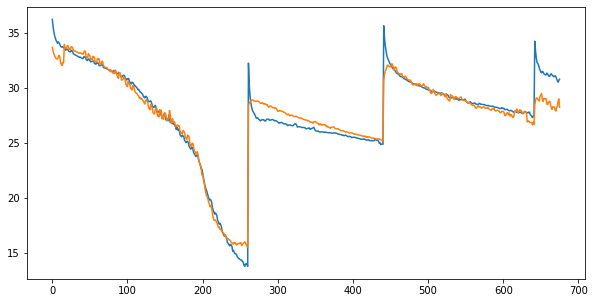

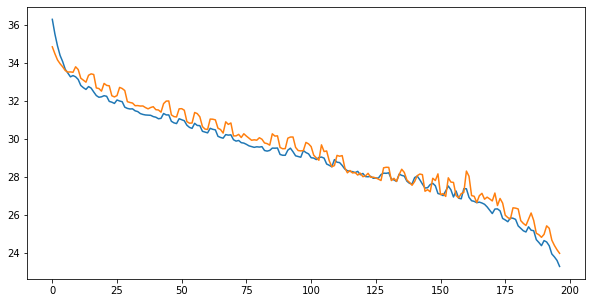

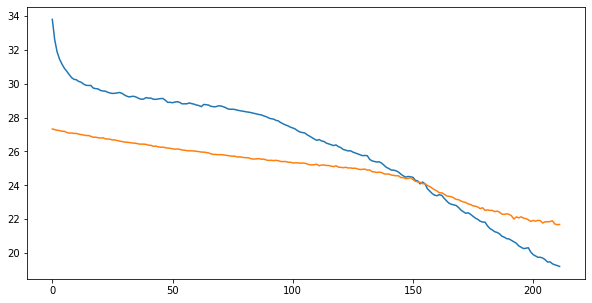

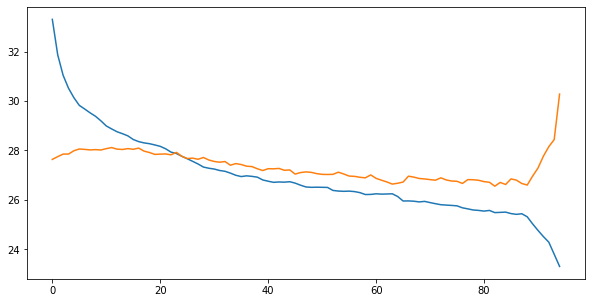

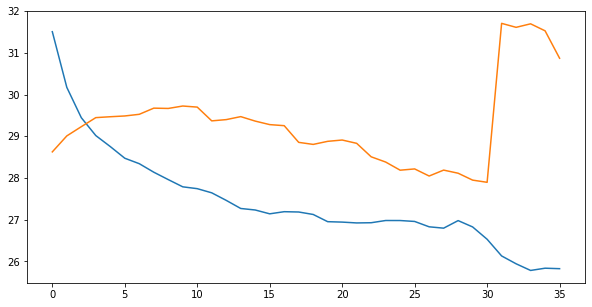

In [207]:
testing_cells=[X_train,C5_features,C6_features,C7_features,C8_features]
testing_caps=[y_train,C5_Capacity,C6_Capacity,C7_Capacity,C8_Capacity]


for i,j in zip(testing_cells,testing_caps):
    y_pred=gp.predict(i)
    print(r2_score(j,y_pred))
    print(np.sqrt(mean_squared_error(j,y_pred)))
    plt.figure(figsize=(10,5))
    plt.plot(j)
    plt.plot(y_pred)